In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20.0,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38.0,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20.0,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20.0,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,Yes,20.0,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       302 non-null    float64
 1   anaemia                   302 non-null    int64  
 2   creatinine_phosphokinase  302 non-null    int64  
 3   diabetes                  302 non-null    object 
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       302 non-null    int64  
 6   platelets                 302 non-null    float64
 7   serum_creatinine          302 non-null    float64
 8   serum_sodium              302 non-null    int64  
 9   sex                       302 non-null    int64  
 10  smoking                   302 non-null    int64  
 11  time                      302 non-null    int64  
 12  DEATH_EVENT               302 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 30.8+ KB


# Data Cleaning

In [4]:
df[~df['diabetes'].str.isdigit()]['diabetes'].value_counts()

diabetes
Yes    3
No     2
Name: count, dtype: int64

In [5]:
df.replace({
    'Yes': '1',
    'No': '0'
},inplace= True)

In [6]:
df[~df['diabetes'].str.isdigit()]['diabetes'].value_counts()

Series([], Name: count, dtype: int64)

In [7]:
df['diabetes'] = pd.to_numeric(df['diabetes'], errors= "coerce")

In [8]:
df['ejection_fraction'].fillna(df['ejection_fraction'].mean(),inplace=True)

In [9]:
df.duplicated().sum()

3

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 32.7 KB


# EDA

**Target Variable Distribution**

In [12]:
target_var_distribution = df['DEATH_EVENT'].value_counts().reset_index()
target_var_distribution

,DEATH_EVENT,count
0,0,203
1,1,96


Text(0.5, 1.0, 'Distribution of Death Events')

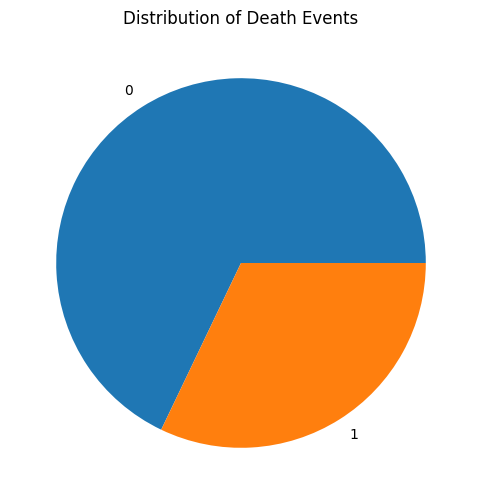

In [13]:
# Basic Target Distribution.
plt.figure(figsize=(8,6))
plt.pie(x= target_var_distribution['count'],labels=target_var_distribution['DEATH_EVENT'])
plt.title("Distribution of Death Events")

Analysis shows that most of the patient survived who were admitted for heart related diseases.

**Age Analysis**

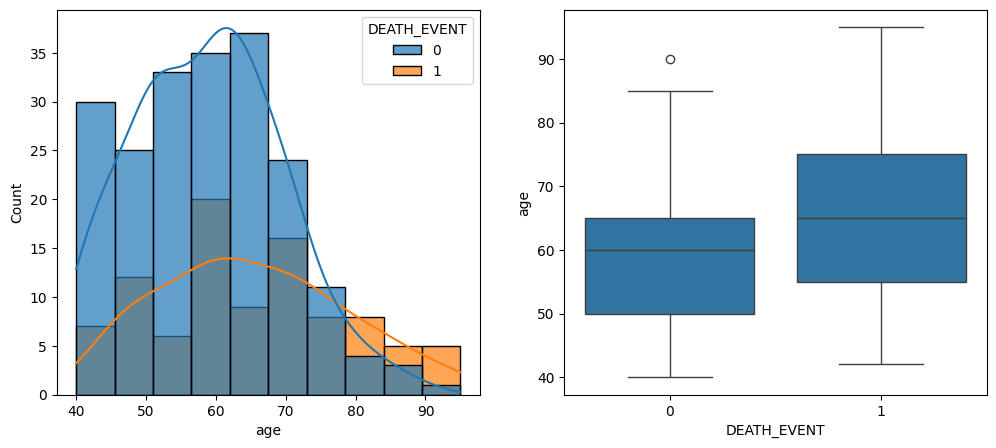

In [14]:
# Age distribution by Outcome.
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='age',hue='DEATH_EVENT',kde= True,alpha=0.7)
plt.subplot(1,2,2)
sns.boxplot(data= df, x= 'DEATH_EVENT',y='age')
plt.show()

Age distribution is right skewed but in case of death event aged people are more likely to die.

**Key Medical Indicators**

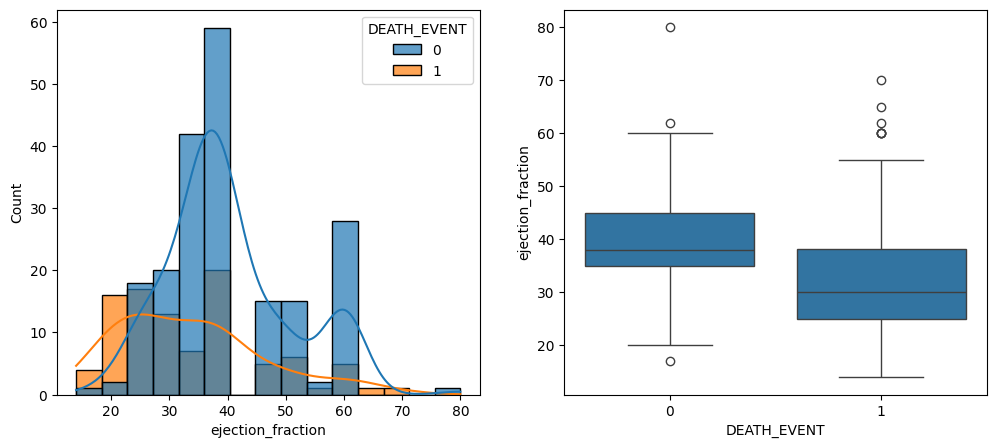

In [15]:
#Ejection fraction - critical heart function metric.
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='ejection_fraction',hue='DEATH_EVENT',kde= True,alpha=0.7)
plt.subplot(1,2,2)
sns.boxplot(data= df, x= 'DEATH_EVENT',y='ejection_fraction')
plt.show()

Ejection Fraction in both survival and death event is bimodal. In survival case mean ejection_fraction is more than in death cases.

**Survival Time Analysis**

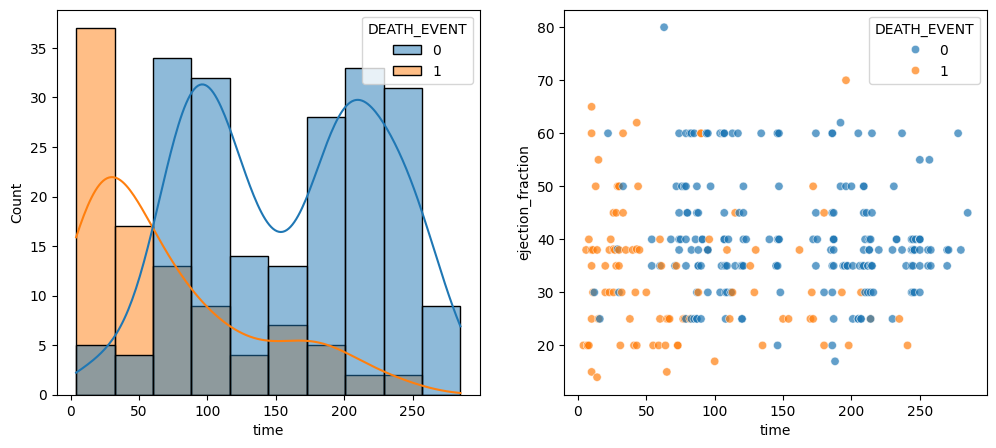

In [16]:
#Time (follow-up period) analysis
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='time',hue='DEATH_EVENT',kde=True)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x='time',y='ejection_fraction',hue= 'DEATH_EVENT', alpha=0.7)
plt.show()

It is clear from these charts that those who died, died in early stages of follow up. Time distribution for dead people is extremly right skewed.

**Correlation Heatmap**

Text(0.5, 1.0, 'Feature Correlation Matrix')

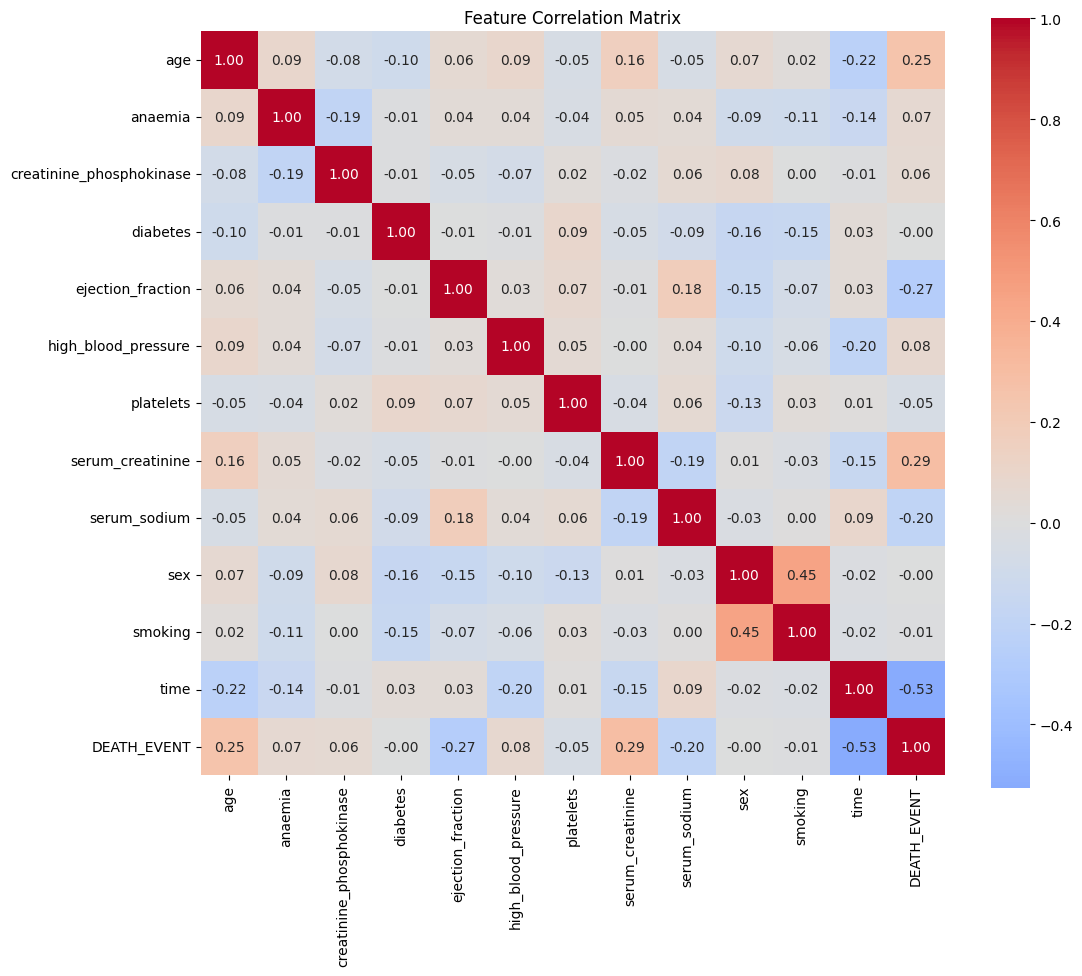

In [17]:
#Overall Correlation matrix.
plt.figure(figsize=(12,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',center=0,square=True,fmt='.2f')
plt.title("Feature Correlation Matrix")

In case of death event features like age, ejection_fraction,serum_creatanine,serum_sodium and time are higly correlated.

**Kidney Function Indicators**

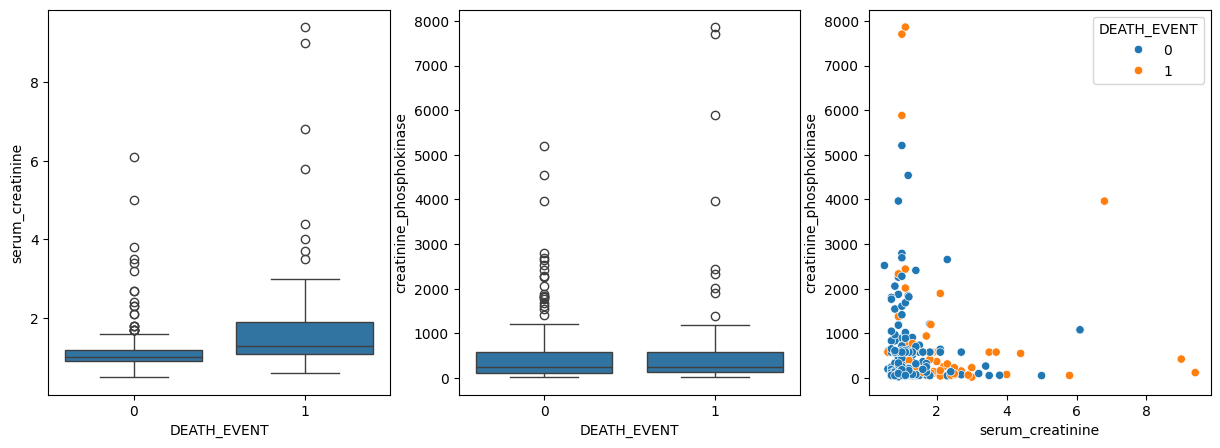

In [18]:
#Serum creatinine and creatinine phosphokinase
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data=df, x='DEATH_EVENT', y = 'serum_creatinine')
plt.subplot(1,3,2)
sns.boxplot(data=df, x='DEATH_EVENT', y = 'creatinine_phosphokinase')
plt.subplot(1,3,3)
sns.scatterplot(data=df, x='serum_creatinine',y='creatinine_phosphokinase',hue='DEATH_EVENT')
plt.show()

In case of death event mean serum_creatanine is more. No conclusion on creatanine_phosphokinase.

**Comorbidities Analysis**

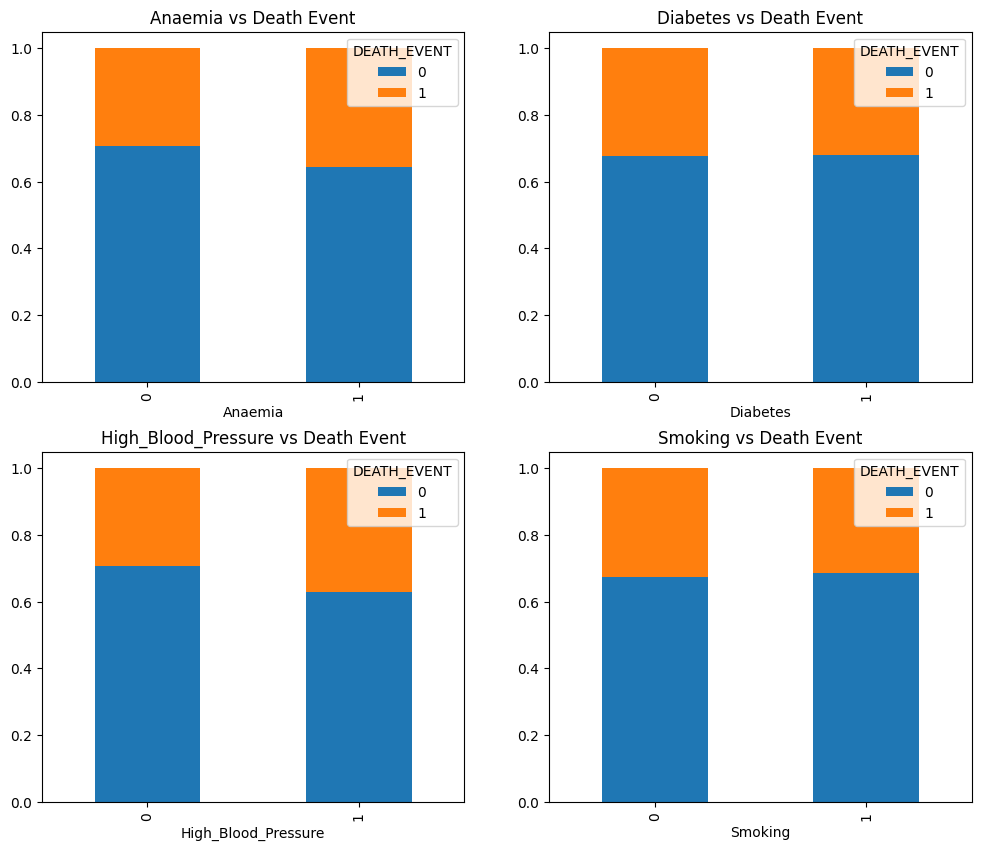

In [19]:
fig, axes = plt.subplots(2,2, figsize=(12,10))
conditions = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']
for i, condition in enumerate(conditions):
    ax = axes[i//2, i%2]
    crosstab = pd.crosstab(df[condition],df['DEATH_EVENT'],normalize='index')
    crosstab.plot(kind='bar',ax=ax,stacked=True)
    ax.set_title(f"{condition.title()} vs Death Event")
    ax.set_xlabel(condition.title())

No concrete inference can be drawn about comorbidity from these charts.

**Blood Chemistry Analysis**

<Axes: xlabel='platelets', ylabel='serum_sodium'>

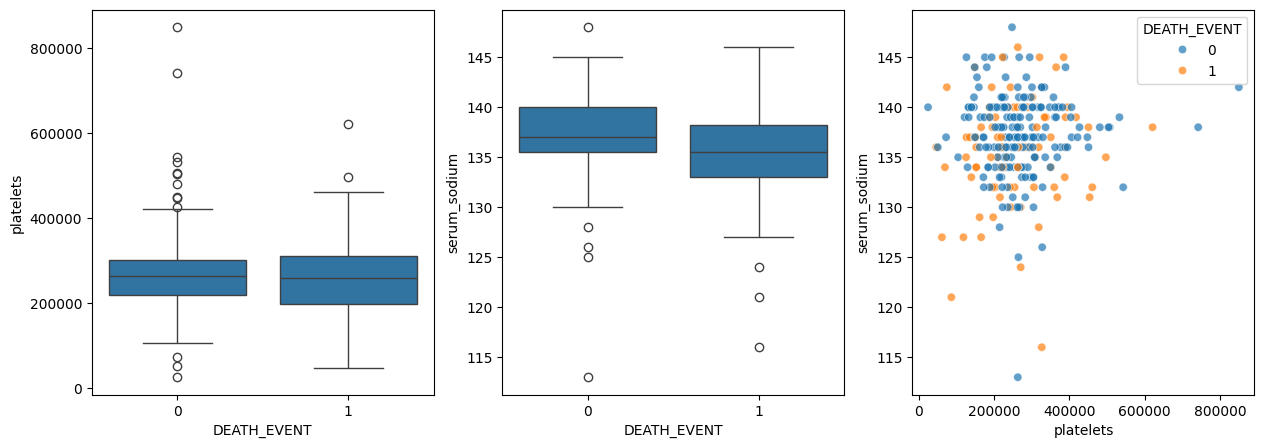

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data=df,x='DEATH_EVENT',y='platelets')
plt.subplot(1,3,2)
sns.boxplot(data=df,x='DEATH_EVENT', y= 'serum_sodium')
plt.subplot(1,3,3)
sns.scatterplot(data=df, x= 'platelets',y= 'serum_sodium',hue= 'DEATH_EVENT',alpha=0.7)

No concrete inference can be drawn about relation between death and blood chemistry from these charts.

**Gender Analysis**

<Axes: xlabel='sex', ylabel='age'>

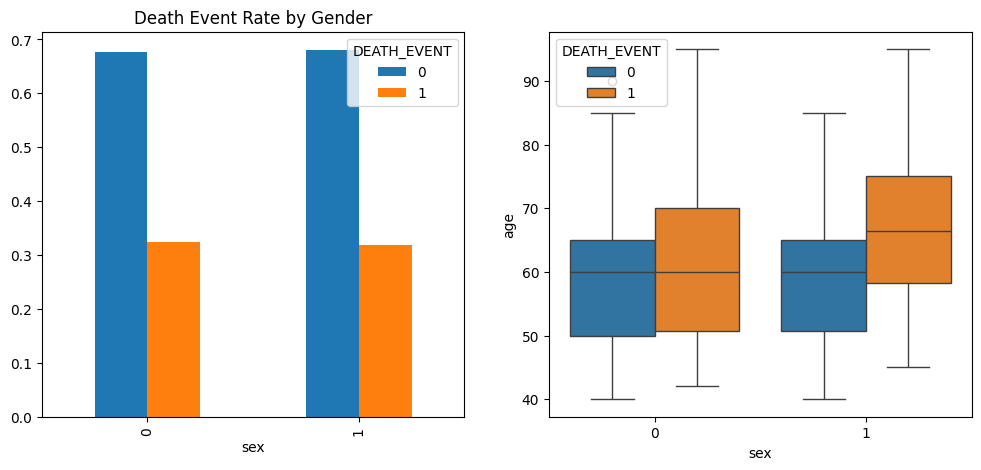

In [21]:
#Sex distribution and its relationship with outcome
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
crosstab_sex = pd.crosstab(df['sex'],df['DEATH_EVENT'],normalize='index')
crosstab_sex.plot(kind='bar', ax= plt.gca())
plt.title("Death Event Rate by Gender")
plt.subplot(1,2,2)
sns.boxplot(data=df, x='sex', y='age',hue="DEATH_EVENT")

No concrete inference can be drawn about relation between death and blood chemistry from these charts.

# Model Building

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [23]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [26]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'K Nearest Neighbors' : KNeighborsClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
    'XGBoost Classifier' : XGBClassifier()
}

In [27]:
models_accuracy_score = {}
for name,mdl in models.items():
    print(f"Training {name} model.")
    model = mdl
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mdl_accuracy = accuracy_score(y_test,y_pred)
    models_accuracy_score[name] = mdl_accuracy
    print(f"Accuracy Score:{mdl_accuracy}")
    print(classification_report(y_test,y_pred,zero_division=0))

Training Logistic Regression model.
Accuracy Score:0.8
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60

Training Support Vector Machine model.
Accuracy Score:0.75
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

Training Decision Tree Classifier model.
Accuracy Score:0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      0.83      0.74        35
           1       0.65      0.44      0.52     

In [28]:
model_with_max_accuracy = max(models_accuracy_score,key = models_accuracy_score.get)
model_with_max_accuracy                              

'Logistic Regression'

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

In [31]:
mdl = LogisticRegression()

In [32]:
ultimate_model = GridSearchCV(estimator=mdl,param_grid=params,n_jobs=-1,cv=5)

In [33]:
ultimate_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [34]:
ultimate_model.best_params_

{'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [35]:
ultimate_model.best_score_

0.8407801418439718

In [36]:
import pickle

with open('ultimate_model.pkl', 'wb') as f:
    pickle.dump(ultimate_model,f)